### Mariam Sedrakyan 
## Analysis Report 
#### 11/21/2023

I want to compare and contrast my two favorite albums for my analysis report. ___"Burlesque" by Christina Aguilera AND "Everyday Is Christmas by Sia"___ The goal and motivation behind this analysis are to learn how to visually demonstrate my analysis and understand the relationship between two albums based on different types of audio features using graphs by comparing and contrasting the ___"danceability" and "tempo"___ of the tracks.  



# Everyday is Chrsitmas by Sia	&#127876;
"I thought we had a bit of a shortage of good Christmas music," Sia said in 2017, speaking just before the album's release. "There are the classics and stuff, but anything new, I was not vibing that much on it." I love this album because Sia introduced us to new snowmen, Santa, and Christmas puppies. She describes the process of making this album as "It was easy and fun. So, we did it in two weeks. Moreover, I could not stop writing new songs, so I accidentally ended up with an original album."
 
 This album has a beautiful melody and harmony. Despite the tracks not being so dynamic, many tracks have high danceability. There are several reasons why this is one of my favorite albums. The main reason is the "Christmas." This holiday is about happiness and joy, which brings people together and helps them forget everyday problems. Another reason is the tracks and the lyrics. This is an album full of positive messages and love. My favorite song from the playlist is "Snowman." This song is about loving each other and caring for the ones we love. The essential message of "Snowman" is understanding that this life is worth living with someone you love and doing everything to protect them. Overall I chose this album to share some positive vibes during this cold season.

Listen: [Snowman by Sia](https://www.youtube.com/watch?v=J_QGZspO4gg)
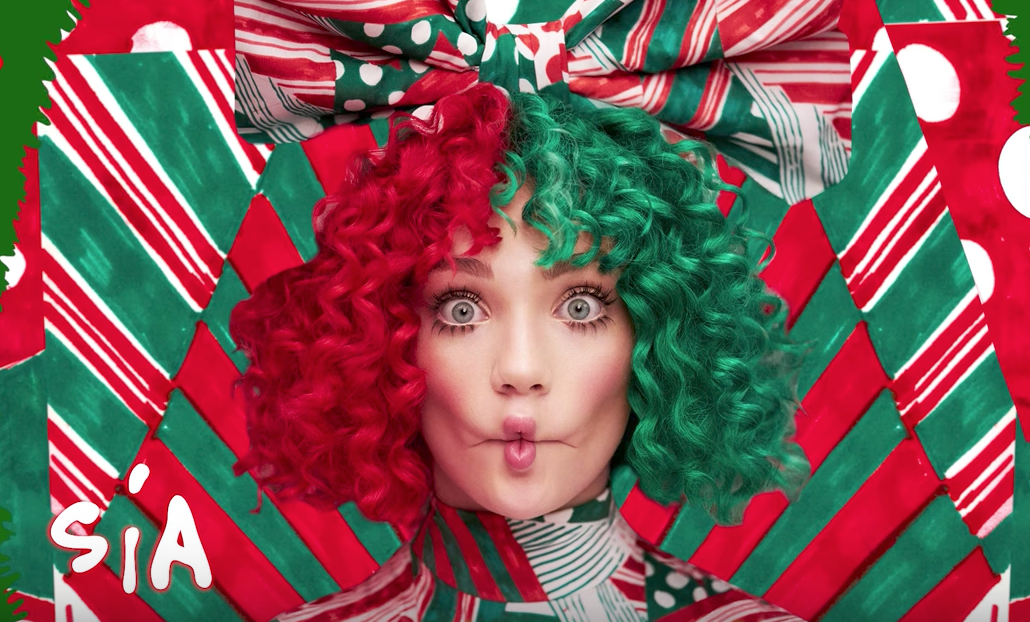

# Burlesque by Cher and Christina Aguilera 	&#128131; 
Burlesque is an album based on the musical"Burlesque" from 2010 that became popular quickly because of its unique approach. This album was a great representation of 50s sound with contemporary. The unique voice of Christina Aguilera brings the burlesque from the past straight to the current club with a modern bump that takes you to the past. Another significant factor that helped this album to get famous is the all-time icon "Cher," she has a total of 2 tracks. However, they give the album a new flavor and perspective. I also want to talk about the Musical because that's how I got obsessed with this album. Christian Agulera was the main singer and dancer in this musical, and she also wrote "Express," "Bount to You," and "Burlesque." During one of her interviews, she said, "I knew what I wanted to do with it." She was right because the album's most popular and loved track is "Express." I love all the songs on this album, and it is tough to pick one. Christina Agulera is a great singer with a beautiful voice, actress skills, and dance.



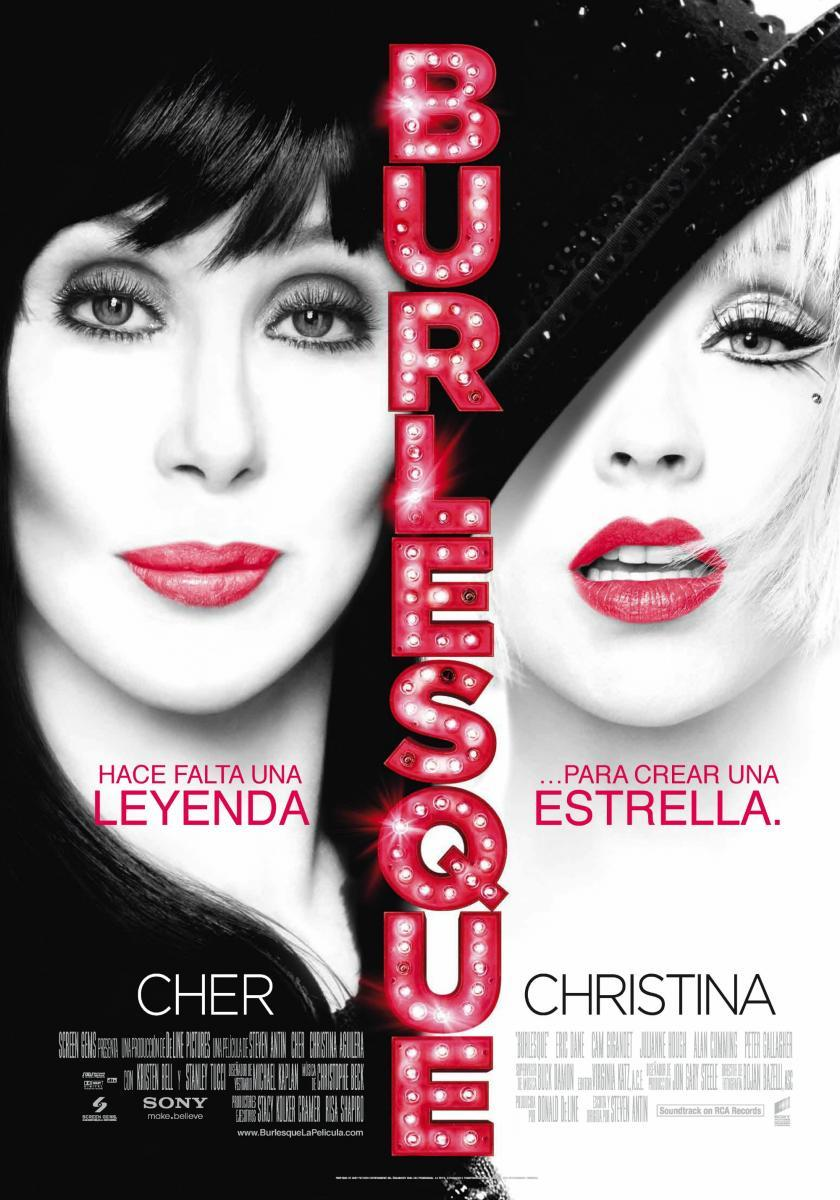

In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import requests
import base64
import json
import urllib


Below are the functions I used to get access tokens from Spotify's API. 
An access token is a string representing the authorization granted to the client. It is used in HTTP to prove the authenticity of the sender and receiver.

In [2]:
Client_ID = pd.read_csv("Spotify-Keys_9-23-21.txt")['Client_ID'].iloc[0]
Client_Secret = pd.read_csv("Spotify-Keys_secret.txt")['Client_Secret'].iloc[0]

Some of the information need to be hidden for confidentiality 

In [3]:
# Client_ID

In [4]:
# Client_Secret

In [5]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode("ascii"))

In [6]:
# client_cred

In [7]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

In [8]:
# headers

I am getting the access to token to check the response

In [9]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [10]:
session_key_response = requests.post(url = url, data = payload, headers = headers)

In [11]:
session_key_response.status_code

200

In [12]:
# session_key_response.json()['access_token']

In [13]:
session_header_key = session_key_response.json()

In [14]:
key = session_header_key['access_token']

After the access I need an authorization

In [15]:
session_headers = {"Authorization": "Bearer {}".format(key)}

In [16]:
# session_headers

## Everyday Is Christmas 

This is the Sia album ID I got from Spotify.

In [17]:
sia_id="2vcGYJcPfXUmCdcXXqqukg"

The first endpoint I am using is ___albums/tracks___ that will allow me to get all the tracks from the album by using .format(album ID)

In [18]:
sia_album_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(sia_id)

In [19]:
sia_album_response = requests.get(url = sia_album_url, headers = session_headers)
sia_album_response.status_code

200

I need to turn the data into .json() file 

In [20]:
sia_christmas = sia_album_response.json()

In [21]:
sia_christmas.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

Below, I turn the .json file into DataFrame to clearly present the data I will be working with.    
There is too much information about the tracks; however, I only need the ID of every track. I included the name to make the graph more understandable 

In [22]:
sia_df = pd.DataFrame(sia_christmas['items'])
sia_df_narrowed = pd.DataFrame(sia_df[[ 'name', 'id']])
sia_df_narrowed.head(10)

,name,id
0,Santa's Coming for Us,1N1ZpYUJc9fwrqk53FGgWv
1,Candy Cane Lane,4KevTcBXEIYxXVyPE78XXm
2,Snowman,7uoFMmxln0GPXQ0AcCBXRq
3,Snowflake,0DbGG3nbq1R3TNLkKTx6aZ
4,Ho Ho Ho,22Vt9E25fsRcQdcUjNTUQr
5,Puppies Are Forever,5Uj1LL6HaSFYlfyC6o42ZC
6,Sunshine,0ApkFFU362NocXTexqWPYn
7,Underneath the Mistletoe,6HFKeEGEJGI0rIyg2r0iLo
8,Everyday Is Christmas,30DnQCN64v8xBpGZpLgb6l
9,Underneath the Christmas Lights,1KuPjp2SyimuFq2Hh62Tym


After getting the ID, I joined them to use my second endpoint, the audio-features.

 The audio-features will allow me to see all the features each track has

In [23]:
sia_audio_features = 'https://api.spotify.com/v1/audio-features?ids={}'\
.format(','.join(list(sia_df ['id'])))

In [24]:
sia_audio_features

'https://api.spotify.com/v1/audio-features?ids=1N1ZpYUJc9fwrqk53FGgWv,4KevTcBXEIYxXVyPE78XXm,7uoFMmxln0GPXQ0AcCBXRq,0DbGG3nbq1R3TNLkKTx6aZ,22Vt9E25fsRcQdcUjNTUQr,5Uj1LL6HaSFYlfyC6o42ZC,0ApkFFU362NocXTexqWPYn,6HFKeEGEJGI0rIyg2r0iLo,30DnQCN64v8xBpGZpLgb6l,1KuPjp2SyimuFq2Hh62Tym,7nMwW8hKct1yCCOpaNmMaY,3msZWSvVMIybnhN29nK2KM,3lhTIJepO4zHFK7sllezGz'

In [25]:
sia_features_response = requests.get(url = sia_audio_features , headers = session_headers)
sia_features_response.status_code

200

In [26]:
sia_features = sia_features_response.json()

I turned the data into a graph using DataFrame to get a more visual representation.

From the graph, we can see more detailed information about each track. 

In [27]:
sia_features_df = pd.DataFrame(sia_features['audio_features'])
sia_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.547,0.814,1,-6.191,1,0.1200,0.02150,0.000000,0.0475,0.724,92.986,audio_features,1N1ZpYUJc9fwrqk53FGgWv,spotify:track:1N1ZpYUJc9fwrqk53FGgWv,https://api.spotify.com/v1/tracks/1N1ZpYUJc9fw...,https://api.spotify.com/v1/audio-analysis/1N1Z...,205267,4
1,0.589,0.910,1,-4.206,0,0.0623,0.00366,0.000049,0.0843,0.394,130.017,audio_features,4KevTcBXEIYxXVyPE78XXm,spotify:track:4KevTcBXEIYxXVyPE78XXm,https://api.spotify.com/v1/tracks/4KevTcBXEIYx...,https://api.spotify.com/v1/audio-analysis/4Kev...,212387,4
2,0.716,0.512,1,-6.257,1,0.0331,0.48300,0.000000,0.0928,0.326,104.957,audio_features,7uoFMmxln0GPXQ0AcCBXRq,spotify:track:7uoFMmxln0GPXQ0AcCBXRq,https://api.spotify.com/v1/tracks/7uoFMmxln0GP...,https://api.spotify.com/v1/audio-analysis/7uoF...,165907,3
3,0.586,0.359,3,-8.553,1,0.0298,0.43800,0.000000,0.0988,0.186,134.351,audio_features,0DbGG3nbq1R3TNLkKTx6aZ,spotify:track:0DbGG3nbq1R3TNLkKTx6aZ,https://api.spotify.com/v1/tracks/0DbGG3nbq1R3...,https://api.spotify.com/v1/audio-analysis/0DbG...,242867,4
4,0.716,0.742,0,-5.103,1,0.0407,0.03380,0.000000,0.1050,0.879,129.014,audio_features,22Vt9E25fsRcQdcUjNTUQr,spotify:track:22Vt9E25fsRcQdcUjNTUQr,https://api.spotify.com/v1/tracks/22Vt9E25fsRc...,https://api.spotify.com/v1/audio-analysis/22Vt...,205627,4


For my further analysis, I decided to choose the 'danceability', 'tempo'

According to "Spatify for Developers" Temp refers to The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

Based on "Spatify for Developers" Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.s  

I included the "ID" to combine my two graphs to get a more visually understandable graph.

In [28]:
sia_respond_df = pd.DataFrame(sia_features_df[['danceability','tempo','id']])
sia_respond_df.head(10)

,danceability,tempo,id
0,0.547,92.986,1N1ZpYUJc9fwrqk53FGgWv
1,0.589,130.017,4KevTcBXEIYxXVyPE78XXm
2,0.716,104.957,7uoFMmxln0GPXQ0AcCBXRq
3,0.586,134.351,0DbGG3nbq1R3TNLkKTx6aZ
4,0.716,129.014,22Vt9E25fsRcQdcUjNTUQr
5,0.462,169.926,5Uj1LL6HaSFYlfyC6o42ZC
6,0.357,137.864,0ApkFFU362NocXTexqWPYn
7,0.601,123.945,6HFKeEGEJGI0rIyg2r0iLo
8,0.553,148.074,30DnQCN64v8xBpGZpLgb6l
9,0.362,115.347,1KuPjp2SyimuFq2Hh62Tym


Below, we can see all 12 songs on the playlist with their name, danceability, tempo, and ID. From this graph, we can get an overall idea that this playlist is a mix of songs that are not very danceable and somewhat danceable. The two songs with high danceability are "Snowman" and "Round and Round."

In [29]:
joined_sia_df = pd.merge(sia_df_narrowed,sia_respond_df, how = 'inner', on = 'id')
joined_sia_df

,name,id,danceability,tempo
0,Santa's Coming for Us,1N1ZpYUJc9fwrqk53FGgWv,0.547,92.986
1,Candy Cane Lane,4KevTcBXEIYxXVyPE78XXm,0.589,130.017
2,Snowman,7uoFMmxln0GPXQ0AcCBXRq,0.716,104.957
3,Snowflake,0DbGG3nbq1R3TNLkKTx6aZ,0.586,134.351
4,Ho Ho Ho,22Vt9E25fsRcQdcUjNTUQr,0.716,129.014
5,Puppies Are Forever,5Uj1LL6HaSFYlfyC6o42ZC,0.462,169.926
6,Sunshine,0ApkFFU362NocXTexqWPYn,0.357,137.864
7,Underneath the Mistletoe,6HFKeEGEJGI0rIyg2r0iLo,0.601,123.945
8,Everyday Is Christmas,30DnQCN64v8xBpGZpLgb6l,0.553,148.074
9,Underneath the Christmas Lights,1KuPjp2SyimuFq2Hh62Tym,0.362,115.347


## Burlesque
Next, we will look into our next album, "Burlesque". We will repeat the same steps as we did for the "Everyday is Christmas" album to get the "danceability" and "tempo" of the tracks 

In [30]:
aguilera_id ="0QBvFEEEIsXS7A1ANtWucb"

In [31]:
aguilera_album_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(aguilera_id)

In [32]:
aguilera_album_response = requests.get(url = aguilera_album_url, headers = session_headers)
aguilera_album_response.status_code

200

In [33]:
aguilera_burlesque = aguilera_album_response.json()

In [34]:
aguilera_burlesque.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

Below we can see all the track names with IDs. 

In [35]:
aguilera_df = pd.DataFrame(aguilera_burlesque ['items'])
aguilera_df_narrowed = pd.DataFrame(aguilera_df [[ 'name', 'id']])
aguilera_df_narrowed



,name,id
0,Ain't No Other Man,3Uz3vJwsLUmTyMrJcSPyfW
1,Genie in a Bottle,08nVUcmxMtM5zDBziFGgYs
2,What a Girl Wants,7LmPuD4ceODCan0kPRt2eU
3,Dirrty,7LvnthRjwpHmGntcSp7Che
4,Beautiful,0rK1D8vCmarKfkuYpqtzUP
5,When You Put Your Hands on Me,1LUk7OUm4Yml3qXvRA3h4d
6,Can't Hold Us Down,3xVky6ENs7H7CCs5UOoSGa
7,Fighter,5ozpErL8pvCsyC2mptM8K5
8,Come on Over (All I Want Is You),3FUZSZ7IpCytJFMFZ1K3h5
9,"Get Mine, Get Yours",4SKKoAEU5iv2E08v6Mha4D


In [36]:
aguilera_audio_features = 'https://api.spotify.com/v1/audio-features?ids={}'\
.format(','.join(list(aguilera_df ['id'])))

In [37]:
aguilera_audio_features

'https://api.spotify.com/v1/audio-features?ids=3Uz3vJwsLUmTyMrJcSPyfW,08nVUcmxMtM5zDBziFGgYs,7LmPuD4ceODCan0kPRt2eU,7LvnthRjwpHmGntcSp7Che,0rK1D8vCmarKfkuYpqtzUP,1LUk7OUm4Yml3qXvRA3h4d,3xVky6ENs7H7CCs5UOoSGa,5ozpErL8pvCsyC2mptM8K5,3FUZSZ7IpCytJFMFZ1K3h5,4SKKoAEU5iv2E08v6Mha4D,4ujVynLt4yCapnCgWztYPq'

In [38]:
aguilera_features_response = requests.get(url = aguilera_audio_features , headers = session_headers)
aguilera_features_response.status_code

200

In [39]:
aguilera_features = aguilera_features_response.json()

In [40]:
aguilera_features_df = pd.DataFrame(aguilera_features['audio_features'])
aguilera_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.709,0.421,5,-9.054,0,0.0308,0.1250,0.630000,0.1080,0.447,106.676,audio_features,3Uz3vJwsLUmTyMrJcSPyfW,spotify:track:3Uz3vJwsLUmTyMrJcSPyfW,https://api.spotify.com/v1/tracks/3Uz3vJwsLUmT...,https://api.spotify.com/v1/audio-analysis/3Uz3...,238867,4
1,0.586,0.351,1,-10.410,1,0.0283,0.0865,0.000000,0.1450,0.388,100.009,audio_features,08nVUcmxMtM5zDBziFGgYs,spotify:track:08nVUcmxMtM5zDBziFGgYs,https://api.spotify.com/v1/tracks/08nVUcmxMtM5...,https://api.spotify.com/v1/audio-analysis/08nV...,243400,4
2,0.558,0.464,9,-9.788,0,0.0244,0.1140,0.001320,0.0537,0.648,92.868,audio_features,7LmPuD4ceODCan0kPRt2eU,spotify:track:7LmPuD4ceODCan0kPRt2eU,https://api.spotify.com/v1/tracks/7LmPuD4ceODC...,https://api.spotify.com/v1/audio-analysis/7LmP...,242293,4
3,0.765,0.430,7,-10.814,1,0.0500,0.0817,0.380000,0.3610,0.395,101.043,audio_features,7LvnthRjwpHmGntcSp7Che,spotify:track:7LvnthRjwpHmGntcSp7Che,https://api.spotify.com/v1/tracks/7LvnthRjwpHm...,https://api.spotify.com/v1/audio-analysis/7Lvn...,241667,4
4,0.602,0.358,8,-10.117,1,0.0257,0.2740,0.000565,0.1970,0.280,104.557,audio_features,0rK1D8vCmarKfkuYpqtzUP,spotify:track:0rK1D8vCmarKfkuYpqtzUP,https://api.spotify.com/v1/tracks/0rK1D8vCmarK...,https://api.spotify.com/v1/audio-analysis/0rK1...,243400,4


After getting the ID number of all the tracks and joining them together, I took out the same audio features as I did for the first album,

In [41]:
aguilera_respond_df = pd.DataFrame(aguilera_features_df[['danceability','tempo','id']])
aguilera_respond_df

,danceability,tempo,id
0,0.709,106.676,3Uz3vJwsLUmTyMrJcSPyfW
1,0.586,100.009,08nVUcmxMtM5zDBziFGgYs
2,0.558,92.868,7LmPuD4ceODCan0kPRt2eU
3,0.765,101.043,7LvnthRjwpHmGntcSp7Che
4,0.602,104.557,0rK1D8vCmarKfkuYpqtzUP
5,0.518,143.776,1LUk7OUm4Yml3qXvRA3h4d
6,0.627,92.964,3xVky6ENs7H7CCs5UOoSGa
7,0.519,83.988,5ozpErL8pvCsyC2mptM8K5
8,0.703,95.891,3FUZSZ7IpCytJFMFZ1K3h5
9,0.719,104.183,4SKKoAEU5iv2E08v6Mha4D


In [42]:
joined_aguilera_df = pd.merge(aguilera_df_narrowed,aguilera_respond_df, how = 'inner', on = 'id')


In [43]:

joined_aguilera_df.columns

Index(['name', 'id', 'danceability', 'tempo'], dtype='object')

In [44]:
joined_aguilera_df.shape

(11, 4)


Below is a more clean and narrowed graph with the audio featured and the name that I will use to continue my analysis

In [45]:
joined_aguilera_df

,name,id,danceability,tempo
0,Ain't No Other Man,3Uz3vJwsLUmTyMrJcSPyfW,0.709,106.676
1,Genie in a Bottle,08nVUcmxMtM5zDBziFGgYs,0.586,100.009
2,What a Girl Wants,7LmPuD4ceODCan0kPRt2eU,0.558,92.868
3,Dirrty,7LvnthRjwpHmGntcSp7Che,0.765,101.043
4,Beautiful,0rK1D8vCmarKfkuYpqtzUP,0.602,104.557
5,When You Put Your Hands on Me,1LUk7OUm4Yml3qXvRA3h4d,0.518,143.776
6,Can't Hold Us Down,3xVky6ENs7H7CCs5UOoSGa,0.627,92.964
7,Fighter,5ozpErL8pvCsyC2mptM8K5,0.519,83.988
8,Come on Over (All I Want Is You),3FUZSZ7IpCytJFMFZ1K3h5,0.703,95.891
9,"Get Mine, Get Yours",4SKKoAEU5iv2E08v6Mha4D,0.719,104.183


The first graph is an example of histograms where I used atplotlib. pyplot to create this figure. The first graph combines two albums based on danceability, and the second graph combines the tracks from two albums based on their tempos.  
It is essential to know that throughout the rest of the analysis, the __green will represent the "Every day is Christmas album" and the red "Burlesque" album__

### Danceability 
The graph shows that the "Burlesque" album has more danceable songs. The rate starts from 0.52 and goes up to 0.65. This means that the majority of the songs have middle danceability. I also noticed the gap from 0.65 to 0.68. It is interesting to note that there are no songs for this album with this rate of danceability. Next, from 0.68 to 0.76, the album has the highest danceable songs. Overall, "burlesque" does not have songs with low danceability, but it does have songs with middle and high.

From the previous graph, we can conclude:   
__"Fighter"-lowest danceability  
"Dirrty" -highest danceability__

Conversely, "Everyday is Christmas" has songs with very different danceability rates. The lowest songs start at 0.2 and go up to 0.4. there are few songs, 0.45  to 0.48. The majority of the song has a middle range of danceability from 0.52 to 0.64. However, Sia also incorporated danceable songs into her album. The graph shows that the song with the highest danceability, "Everyday is Christmas," has a 0.79 rate.

From the previous graph, we can conclude:   
__"Sunshine"-lowest danceability  
"Round and Round" -highest danceability__



### Tempo
"Burlesque" has many songs with low beat duration. Most tracks in the album fall between 83 to 110 Beats per minute (BPM). A small number of songs have an above-average from 138 to 144 BPM. This album has the tracks with the lowest BPM.

From the previous graph, we can conclude:   
__"Fighter"- lowest tempo  
"When You Put Your Hands on Me"- highest tempo__


On the other hand, the "Everyday Is Christmas" album is distributed evenly. Most songs have an average of 120 to 138 BPM, and the same amount of songs have high and low BPM. The song with the lowest beat duration has 92 BPM, and the highest 175 BPM. 

From the previous graph, we can conclude:   
__"Santa's Coming for Us- lowest tempo  
"Puppies Are Forever"- highest tempo__

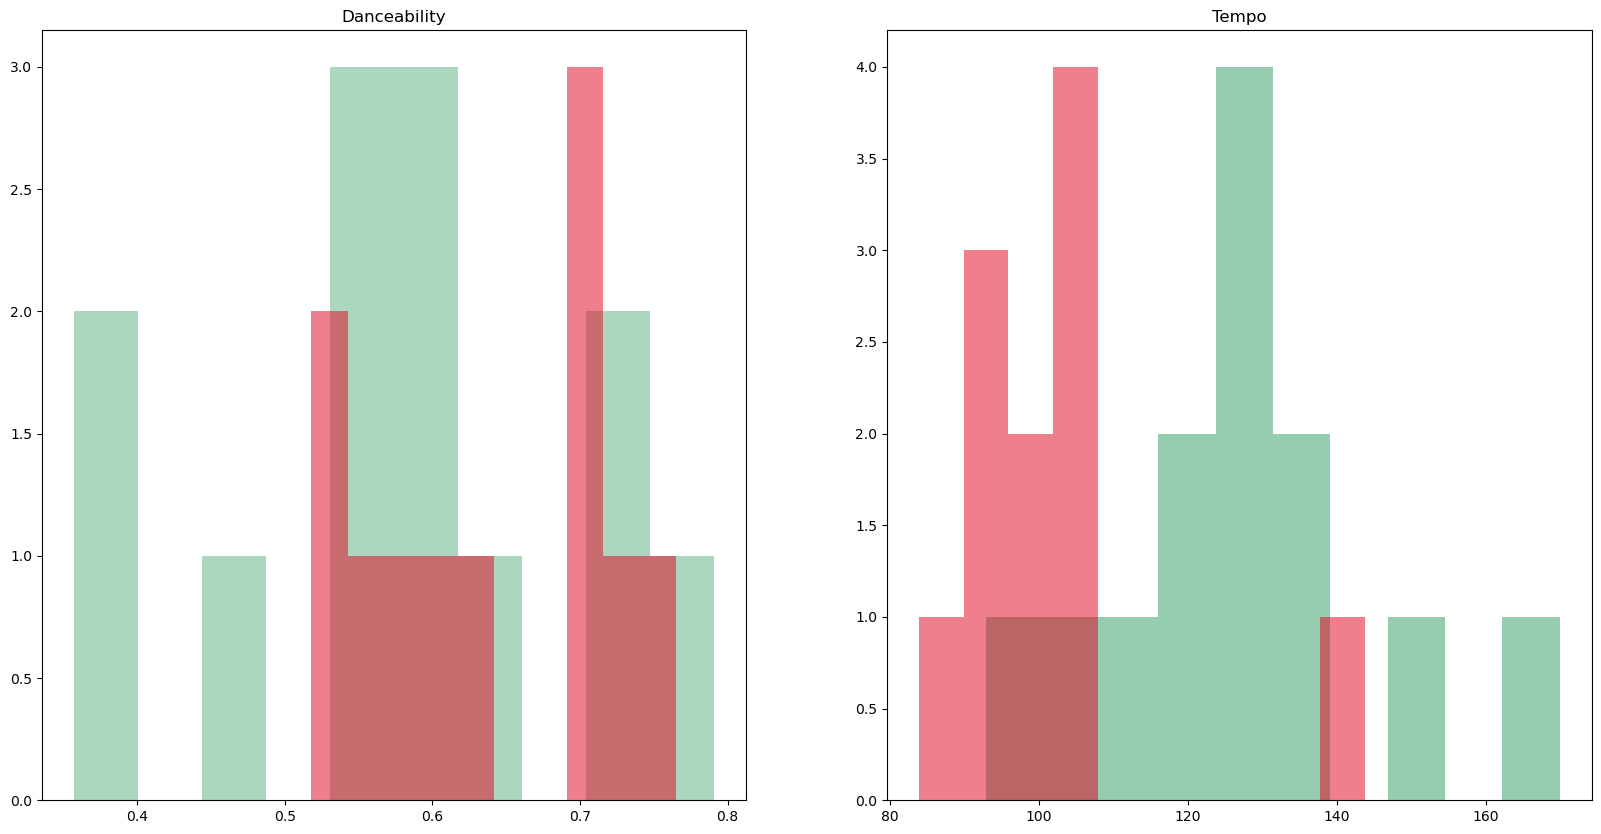

In [46]:
fig1, ax1 = plt.subplots(1,2, figsize = (20,10))
ax1[0].hist(joined_sia_df['danceability'], alpha=0.4, label='Sia', color='#2F9B61')
ax1[0].hist(joined_aguilera_df['danceability'],alpha=0.5, label='Aguilera', color='#E3001E')
ax1[0].set_title('Danceability')
ax1[1].hist(joined_sia_df['tempo'], alpha=0.5, label='Sia', color='#2F9B61')
ax1[1].hist( joined_aguilera_df['tempo'],alpha=0.5, label='Aguilera', color='#E3001E')
ax1[1].set_title('Tempo')
plt.show()

Next, I analyze the albums separately using a scatter plot to show the relationship between the two features.
### Everyday is Christmas 
Based on our graph, most of the songs gave an average rate of danceability and an average rate of temp. However, it is interesting that one song has a high danceability rate of 0.79 but a low temp 120. If I did not analyze, I suggest that the dances with high danceability only have high temp. Another example that opposed my hypothesis is that a song with a high tempo of almost 170 has a danceability rate of 0.45.

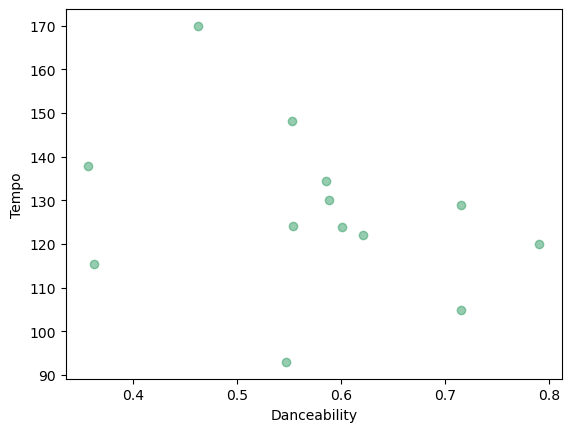

In [47]:
fig3, ax3 =  plt.subplots()
ax3.scatter( x = joined_sia_df ['danceability'], 
             y = joined_sia_df['tempo'],alpha= .5, color ="#2F9B61")

ax3.set_xlabel('Danceability')
ax3.set_ylabel('Tempo')
plt.show()

### Burlesque  
There is only one song with a high tempo of 145 and a low danceability of 0.51 rate. Most of the song increases with danceability and stays stable between 95 and 105 BPM. The graph looks like a wave that has almost constant amplitude.

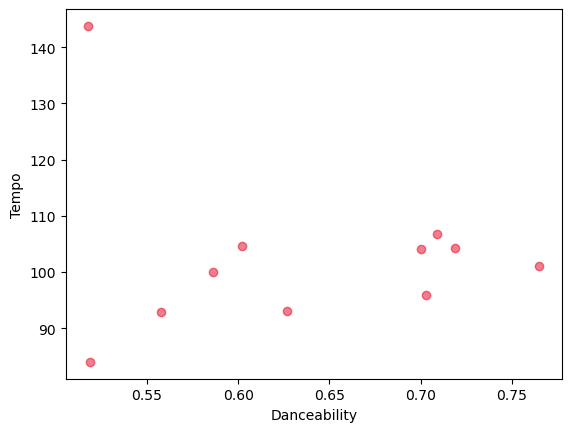

In [48]:
fig4, ax4 =  plt.subplots()
ax4.scatter( x = joined_aguilera_df ['danceability'], 
             y = joined_aguilera_df['tempo'],alpha= .5, color ="#E3001E"  )

ax4.set_xlabel('Danceability')
ax4.set_ylabel('Tempo')
plt.show()

Next, I combined two albums and their feature into one graph using a scatter plot again. I already talked about albums individually. However, here, we can see their direct relationship together. The graph clearly states that "Every Day Is Christmas Album" has a high tempo, and the song with the highest tempo is about 179 BPM; however, it also has the song with the lowest danceability, of 0.1. Also, compared to the other album, Sia's album has a higher tempo. However, Aguilera's album has songs with higher danceability.

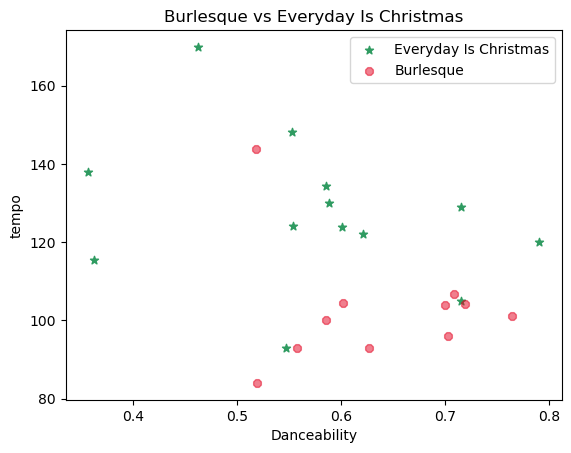

In [49]:
 
fig5, ax5 =  plt.subplots()
ax5.scatter( x = joined_sia_df ['danceability'], 
             y = joined_sia_df ['tempo'],
            label = 'Everyday Is Christmas',
            color = '#2F9B61',
            marker ='*')
ax5.scatter( x = joined_aguilera_df ['danceability'], 
             y = joined_aguilera_df ['tempo'],
            label = 'Burlesque',
            alpha= .5, 
            marker ='8',
           color = '#E3001E')

ax5.set_title('Burlesque vs Everyday Is Christmas')
ax5.set_xlabel('Danceability')
ax5.set_ylabel('tempo')
ax5.legend()

plt.show()


I picked the "tempo" as my audio feature for my following visual graphic to compare my two albums.  

Finally, I used a boxplot and scatter plot to show the differences between these two albums. We can see the median value for both albums. The Aguilera's album is around 100, very low compared to Sia's, which is around 125. the graph clearly shows that the "Every Day Is Christmas" album has tracks with a higher BPM. Also, the songs are evenly distributed from the midpoint. The Alguilera's album has one song with a high tempo, and most songs are below the midpoint. 

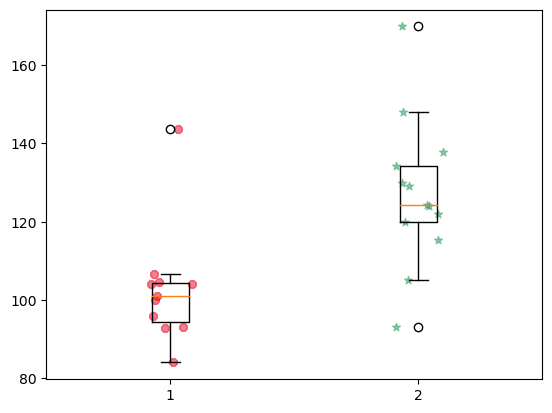

In [50]:
bur_tempo = joined_aguilera_df ['tempo']
chr_tempo = joined_sia_df ['tempo']

bur_ax = [1]*len(bur_tempo)
chr_ax = [2]*len(chr_tempo)

bur_x_jitter = np.random.uniform(-0.10,0.10,len (bur_ax))
chr_x_jitter = np.random.uniform(-0.10,0.10,len (chr_ax))

fig8, ax8=  plt.subplots()
ax8.boxplot(bur_tempo,positions= [1])
ax8.boxplot(chr_tempo,positions= [2])
ax8.scatter(bur_ax + bur_x_jitter, bur_tempo, alpha=0.5, color='#E3001E', marker ='8', label='Aguilera')
ax8.scatter(chr_ax + chr_x_jitter, chr_tempo, alpha=0.5, color='#2F9B61',marker ='*', label='Sia')
plt.show()

## T-test for statistical differences 

Next, I will compare the values of "tempo" between two albums using a t-test. 

In [51]:
reslut1 = stats.ttest_ind(bur_tempo,chr_tempo)
reslut1

TtestResult(statistic=-3.4247478877195503, pvalue=0.002423748115289272, df=22.0)

The P value represents the probability of absorbing the difference between two albums.

Two, "Every day is a Christmas" and "Burlesque," have shallow p values, meaning that these two albums significantly differ in p-value. 

In [52]:

round (reslut1.pvalue,5) 

0.00242

In [53]:
reslut1.statistic

-3.4247478877195503

# Overall

I chose these two albums, expecting them to be different. On the one hand, "Everyday is Christmas " by Sia is happy and joyful. On the other hand, "Burlesque" by Aguilera has more energetic and danceable songs. From my graphs, Sia's songs are more in the middle rate for danceability and temp. However, there were few exceptions, where Aguilera's songs are low with tempo, again with one or two exceptions, and high with disability.

However, I would like to state that I thought there would be a vast difference in "danceability." If we look closer at our first graph, we can see that the difference is insignificant. From my experience, every time I hear the songs from the "Every Day Is Christmas" album, I am not very excited to get up and dance; on the other hand, the "Burlesque" has more club and energetic songs. This leaves me wondering what criteria Spotify uses to decide which song is more danceable and which is not.  

The "tempo" of these two albums is different, which is also surprising for me; however, after visually seeing the graphs and statistics and understanding the tempo of the track, it makes much sense that "Burlesque" has compared to the low rate of BPM. Aguilera's songs need to be faster but are danceable. This is another exciting conclusion I got. The song does not need to have high BPM to be danceable.

One of the Limitations of this data is that we are only comparing two features. Making a bold and true statement based on only two factors is hard. I want to expand my analysis and try to find ways to compare more features and go deeper into what made this album so famous and loved by the advice.